# Value at Risk (VaR)

Part 2

### VaR calculation using Variance-Covariance approach


[*********************100%***********************]  1 of 1 completed


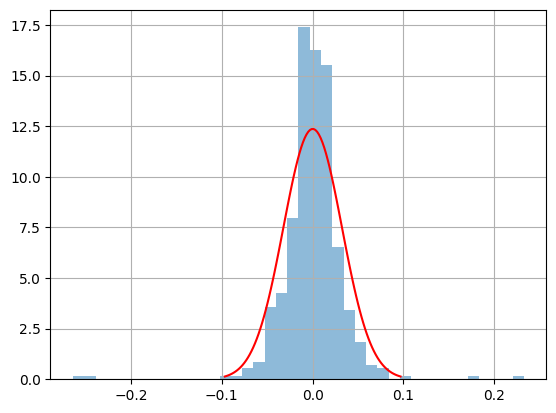

In [2]:
# Libraries
import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate
import scipy

# Plots
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm

# For warnings
import warnings
warnings.filterwarnings("ignore")

# We  import the daily data of META from yahoo finance
# Calculate daily returns
df = yf.download("META", "2021-01-01", "2023-04-04")
df = df[['Close']]
df['returns'] = df.Close.pct_change()


# Now we determine the mean and standard deviation of the daily returns 
# Plot the normal curve against the daily returns

mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mean, std_dev), "r")
plt.show()

Now, we will use confidence level, mean and standard deviation



In [3]:
#Calculate VaR using point percentile function
VaR_95 = norm.ppf(0.05, mean, std_dev)
VaR_99 = norm.ppf(0.01, mean, std_dev)
print (tabulate([['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
95%                      -0.0529338
99%                      -0.0749165


The above values denote the level of confidence in a particular "value" that is at risk of loss.

Consequently, there is a 95% confidence that the loss of value could be -0.0529338 or less, and a 99% confidence that the loss would be -0.0749165 or less. Because all of the values at risk are negative, there is a higher probability that the portfolio will return more than the amount invested.

### VaR calculation using the Historical Simulation approach

[*********************100%***********************]  1 of 1 completed


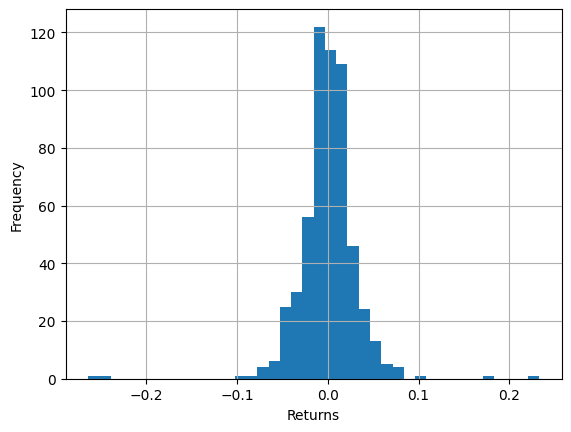

In [4]:
# libraries
import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate

# plots
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#  warnings (no)
import warnings
warnings.filterwarnings("ignore")

# Calculate the daily returns and plot
df = yf.download("META", "2021-01-01", "2023-04-04")
df = df[['Close']]
df['returns'] = df.Close.pct_change()
df = df.dropna()
plt.hist(df.returns, bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
# Calculate the VaR 
VaR_90 = df['returns'].quantile(0.1)
VaR_95 = df['returns'].quantile(0.05)
VaR_99 = df['returns'].quantile(0.01)

print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0336745
95%                      -0.0427361
99%                      -0.0707592


The confidence rate is 90% that the loss may be -0.0336745 and not above.
Similarly for 95% and 99%.

From the above calculation we can see that there is a difference in the percentage of value-at-risk calculated on the basis of historical modeling and the variance-covariance approach. This tells us that the distribution of returns is not totally normal (it seems to be close to normal).

Although both approaches return negative values (indicating a higher probability of higher returns), there is still a difference in the numbers of values, which tells us that the distribution is not exactly normal.